In [1]:
import os
os.environ["PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION"] = 'python'
import numpy as np

from d3rlpy.algos import DiscreteCQL

from recsys_mdp.recsys_mdp import RecSysMDP, SplitByFailureRecSysMDP
from recsys_mdp.utils import to_d3rlpy_form,to_d3rlpy_form_ND
from recsys_mdp.d3rlpy_recsys_metrics import hit_rate
from models import CustomEncoderFactory

In [2]:
def step_by_step_top(new_observation, emb_size, top_k, item_mapping):
    for i in range(top_k):
        actions = algo.predict([new_observation])
        action_embedding = item_mapping[actions[0]]*255
        action_embedding = action_embedding.astype(np.uint8)
       # print(action_embedding * 255)
        idx = new_observation[-emb_size:]
        #new_observation = episode.observations[0].copy()             
        new_observation[0,:-1] = new_observation[0,1:]   
        new_observation[0,-1] = action_embedding         
        yield actions[0]

In [3]:
mdp_train = SplitByFailureRecSysMDP(load_from_file=True, path='./data/SberZvuk_train_39')
#
framestask = 20
emb_size = 10
dataset_train = to_d3rlpy_form_ND(mdp_train.states, mdp_train.rewards,
                               mdp_train.actions, mdp_train.termations,N=3, 
                                  framestack = framestask, emb_size = emb_size)

user_mapping = mdp_train.user_mapping
inv_user_mapping = mdp_train.inv_user_mapping

Data loaded!
(28174, 3, 20, 10)
(28174, 3, 20, 10)
(28174, 1)
(28174, 1)
(28174, 1)


/home/babycar/RecSysMDP/recsys_mdp/recsys_mdp.py:40: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.state_size = np.asarray(self.states).shape
/home/babycar/RecSysMDP/recsys_mdp/recsys_mdp.py:41: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.rewards_size = np.asarray(self.rewards).shape
/home/babycar/RecSysMDP/recsys_mdp/recsys_mdp.py:42: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this,

In [4]:
algo = DiscreteCQL(use_gpu=True, encoder_factory = CustomEncoderFactory(512),batch_size = 32)
algo.build_with_dataset(dataset_train)
algo.load_model('CQL_muse.pt')

In [5]:
mdp_train = SplitByFailureRecSysMDP(load_from_file=True, path='./data/SberZvuk_train_39')
#mdp_train = SplitByFailureRecSysMDP(load_from_file=True, path='./data/SberZvuk_test_39')
        #
        #
framestask = 10
emb_size = 10
num_of_epiode = 0
num_obs = 0
user_idx = 1
dataset_train = to_d3rlpy_form_ND(mdp_train.states, mdp_train.rewards,
                               mdp_train.actions, mdp_train.termations,N=3, 
                                  framestack = framestask, emb_size = emb_size)

user_mapping = mdp_train.user_mapping
inv_user_mapping = mdp_train.inv_user_mapping
item_mapping = mdp_train.item_mapping

algo = DiscreteCQL(use_gpu=True, encoder_factory = CustomEncoderFactory(512),batch_size = 32)
algo.build_with_dataset(dataset_train)
algo.load_model('CQL_muse.pt')

df = mdp_train.dataframe
pkey = dataset_train[num_of_epiode].observations[num_obs][-1,0]/255
print(pkey)
for okey in inv_user_mapping:
            d = np.mean(np.abs(np.asarray(pkey) - np.asarray(okey)))
           # print(d)
            if d < 0.1:
                key = okey
user_idx = inv_user_mapping[tuple(key)]
generator = step_by_step_top(dataset_train[num_of_epiode].observations[num_obs].copy(), emb_size, 10, item_mapping)
items_of_user = df[df['user_idx'] == user_idx]['item_idx']
print(dataset_train[num_of_epiode].actions)
print("----------------------------------------")
user_log = df[df['user_idx'] == user_idx]
for i in generator:
   # print(i)
    if i in dataset_train[num_of_epiode].actions:
        print("!!!! IN episode: ", i)
    if i in items_of_user.values:
        print("IN positive: ", i)
  # recoms.append(i)

Data loaded!
(28174, 3, 20, 10)
(28174, 3, 20, 10)
(28174, 1)
(28174, 1)
(28174, 1)
[0.80392157 0.48235294 0.70196078 0.44705882 0.7372549  0.42352941
 0.89803922 0.61176471 0.70196078 0.27058824]
[10738  3885 19722 19090 18164 11568  3025  5279 11041  6842 12215 12150
  6823  1873 14761  8949 12038  6235 11952 10508 14759 11490 14756  5656
 17876  7359  5006 11233  4822  5601  7186 15008  6760  5765  3247  5905
  7333  2883 11381 17958  7147 11229 13891  6621  2075  3247 17876  3884
 13052 13052  7851 10738 10738 12031  3371 12027 12027 12027  1156 19394
 19394 11724  5781  9165  1649  3247  3884 15073  1789  5905  7792  3095
 11778  3815 12478  1220  3824  3824  7174  3371  1644 13647  7649 13956
 10235  7703 14302  7701  7702 17154  3371 10070 10070 14929  1310  7646
 12715  6566 14198   231  8738 14044  7703  9245  3815  4827 10154  7964
 17644 12715 11816  7700  7705  7700   231 15332   152 10499 12699 11951
 10503 14757 14758 14760 11954 19007 19007  6842 13891   695 12034  3170


In [6]:
3174 in items_of_user.values

False

In [10]:
def get_dist(target_user_idx, num_of_epiode = 0, num_obs = 0):
    recoms = []

    
    mdp_train = SplitByFailureRecSysMDP(load_from_file=True, path='./data/SberZvuk_train_39')
    #
    framestask = 20
    emb_size = 10 
    dataset_train = to_d3rlpy_form_ND(mdp_train.states, mdp_train.rewards,
                                   mdp_train.actions, mdp_train.termations,N=3, 
                                      framestack = framestask, emb_size = emb_size)

    algo = DiscreteCQL(use_gpu=True, encoder_factory = CustomEncoderFactory(512),batch_size = 32)
    algo.build_with_dataset(dataset_train)
    algo.load_model('CQL_muse.pt')
    
    mdp_train = SplitByFailureRecSysMDP(load_from_file=True, path='./data/SberZvuk_test_71')
    dataset_train = to_d3rlpy_form_ND(mdp_train.states, mdp_train.rewards,
                                   mdp_train.actions, mdp_train.termations,N=3, 
                                      framestack = framestask, emb_size = emb_size)
    
    
    
    user_mapping = mdp_train.user_mapping
    inv_user_mapping = mdp_train.inv_user_mapping
    item_mapping = mdp_train.item_mapping
    for episode in dataset_train:
        pkey = episode.observations[num_obs][-1,0]/255
        for okey in inv_user_mapping:
                    d = np.mean(np.abs(np.asarray(pkey) - np.asarray(okey)))
                   # print(d)
                    if d < 0.1:
                        key = okey
      #  print("aboba")
        user_idx = inv_user_mapping[tuple(key)]
        #print(user_idx)
        if user_idx!=target_user_idx:continue
        #print("Here!")
        df = mdp_train.dataframe
        for i in range(len(episode.observations)):
            generator = step_by_step_top(episode.observations[i].copy(), emb_size, 10, item_mapping)
            items_of_user = df[df['user_idx'] == user_idx]['item_idx']

           # print("----------------------------------------")
            user_log = df[df['user_idx'] == user_idx]
            for i in generator:
                recoms.append(i)
    return recoms, target_user_idx

In [11]:
import matplotlib.pyplot as plt

In [12]:
import matplotlib.pyplot as plt

user_1, idx1 = get_dist(43)
user_2, idx2 = get_dist(7)

mdp_test = SplitByFailureRecSysMDP(load_from_file=True, path='./data/SberZvuk_test_71')

df = mdp_test.dataframe

items_of_user_1 = df[df['user_idx'] == idx1]['item_idx']
items_of_user_2 = df[df['user_idx'] == idx2]['item_idx']

items_of_user_2

Data loaded!
(28174, 3, 20, 10)
(28174, 3, 20, 10)
(28174, 1)
(28174, 1)
(28174, 1)
Data loaded!
(5325, 3, 20, 10)
(5325, 3, 20, 10)
(5325, 1)
(5325, 1)
(5325, 1)
Data loaded!
(28174, 3, 20, 10)
(28174, 3, 20, 10)
(28174, 1)
(28174, 1)
(28174, 1)
Data loaded!
(5325, 3, 20, 10)
(5325, 3, 20, 10)
(5325, 1)
(5325, 1)
(5325, 1)
Data loaded!


20315    10968
20316     9433
20317     1906
20318     4428
20319     2336
         ...  
21106    12340
21107    12156
21108    11381
21109     2713
21110    18636
Name: item_idx, Length: 796, dtype: int64

In [14]:
user_2

[9277,
 2857,
 1911,
 840,
 3656,
 5747,
 5747,
 7396,
 6064,
 1773,
 2857,
 1911,
 840,
 3656,
 5747,
 5747,
 11491,
 6273,
 16707,
 7649,
 1911,
 1854,
 3656,
 5747,
 5747,
 2402,
 6064,
 15174,
 16957,
 17124,
 6106,
 11965,
 19185,
 19185,
 7708,
 13224,
 7708,
 7708,
 7708,
 19185,
 3656,
 5747,
 5747,
 6549,
 6273,
 16707,
 7649,
 2075,
 9718,
 3149,
 19185,
 19185,
 17019,
 6273,
 15174,
 11965,
 7708,
 5658,
 18134,
 16311,
 7371,
 6692,
 1854,
 6106,
 19185,
 1854,
 1854,
 14529,
 1854,
 1854,
 6692,
 19185,
 6106,
 6650,
 1854,
 1854,
 14529,
 1854,
 1854,
 1854,
 19185,
 5658,
 19185,
 1854,
 2229,
 9643,
 10576,
 18134,
 16311,
 10576,
 6106,
 6650,
 1854,
 5658,
 14529,
 17674,
 13647,
 5263,
 16957,
 19724,
 19185,
 1854,
 2229,
 14529,
 1220,
 13647,
 5263,
 19520,
 832,
 15007,
 1854,
 7424,
 14529,
 1854,
 6650,
 1630,
 4771,
 6650,
 1630,
 12012,
 7424,
 14529,
 1854,
 6650,
 1630,
 4771,
 13211,
 1630,
 12012,
 13211,
 14529,
 1854,
 1854,
 1630,
 16382,
 6650,
 1630

In [15]:
mdp_test = SplitByFailureRecSysMDP(load_from_file=True, path='./data/SberZvuk_test_71')

df = mdp_test.dataframe

items_of_user_1 = df[df['user_idx'] == idx1]['item_idx']
items_of_user_2 = df[df['user_idx'] == idx2]['item_idx']

Data loaded!


/home/babycar/RecSysMDP/recsys_mdp/recsys_mdp.py:40: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.state_size = np.asarray(self.states).shape
/home/babycar/RecSysMDP/recsys_mdp/recsys_mdp.py:41: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.rewards_size = np.asarray(self.rewards).shape
/home/babycar/RecSysMDP/recsys_mdp/recsys_mdp.py:42: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this,

In [16]:
items_of_user_2

20315    10968
20316     9433
20317     1906
20318     4428
20319     2336
         ...  
21106    12340
21107    12156
21108    11381
21109     2713
21110    18636
Name: item_idx, Length: 796, dtype: int64

(array([23., 12., 45., 18., 32., 19., 34., 30., 26., 17., 26., 37., 20.,
        29., 17., 41., 14., 78., 17., 30., 29., 24., 22., 18., 38., 21.,
        13., 25., 19., 22.]),
 array([   36. ,   690.4,  1344.8,  1999.2,  2653.6,  3308. ,  3962.4,
         4616.8,  5271.2,  5925.6,  6580. ,  7234.4,  7888.8,  8543.2,
         9197.6,  9852. , 10506.4, 11160.8, 11815.2, 12469.6, 13124. ,
        13778.4, 14432.8, 15087.2, 15741.6, 16396. , 17050.4, 17704.8,
        18359.2, 19013.6, 19668. ]),
 <BarContainer object of 30 artists>)

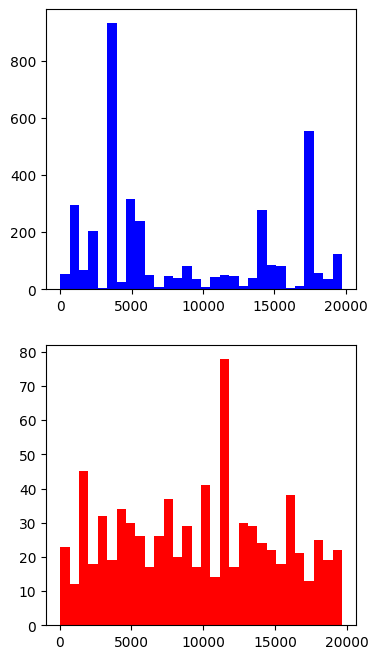

In [17]:
plt.figure(figsize = (4, 8))
plt.subplot(2,1,1)
plt.hist(items_of_user_1, bins = 30, color = 'b', label = 'True User - 1')
plt.subplot(2,1,2)
plt.hist(items_of_user_2, bins = 30, color = 'r', label = 'True User - 2')

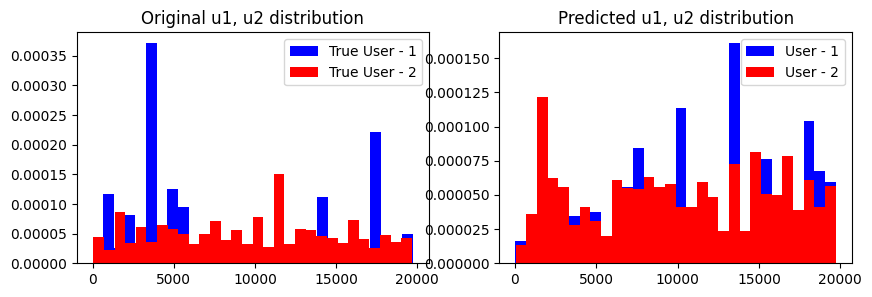

In [18]:
plt.figure(figsize = (10, 3))
plt.subplot(1,2,1)
plt.hist(items_of_user_1, bins = 30, color = 'b', label = 'True User - 1', density=True)
plt.hist(items_of_user_2, bins = 30, color = 'r', label = 'True User - 2', density=True)
plt.legend()

plt.title("Original u1, u2 distribution")
plt.subplot(1,2,2)
plt.title("Predicted u1, u2 distribution")
plt.hist(user_1, bins = 30, color = 'b', label = 'User - 1', density=True)
plt.hist(user_2, bins = 30, color = 'r', label = 'User - 2', density=True)
plt.legend()


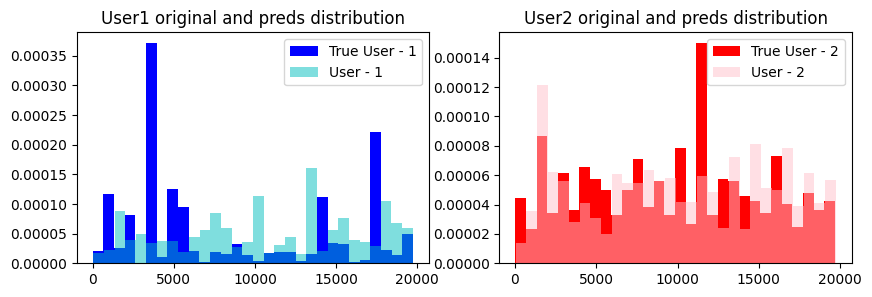

In [19]:
plt.figure(figsize = (10, 3))
plt.subplot(1,2,1)
plt.hist(items_of_user_1, bins = 30, color = 'b', label = 'True User - 1', density=True)
plt.hist(user_1, bins = 30, color = 'c', label = 'User - 1', density=True, alpha = 0.5)
plt.legend()

plt.title("User1 original and preds distribution")
plt.subplot(1,2,2)
plt.title("User2 original and preds distribution")
plt.hist(items_of_user_2, bins = 30, color = 'r', label = 'True User - 2', density=True)
plt.hist(user_2, bins = 30, color = 'pink', label = 'User - 2', density=True, alpha = 0.5)
plt.legend()


In [38]:
user_1_1 = get_dist(1, 0, 0)
user_1_2 = get_dist(1, 2, 0)
user_1_3 = get_dist(1, 3, 0)
user_1_4 = get_dist(1, 4, 0)

Data loaded!
(23715, 3, 10, 10)
(23715, 3, 10, 10)
(23715, 1)
(23715, 1)
(23715, 1)
----------------------------------------
Data loaded!
(23715, 3, 10, 10)
(23715, 3, 10, 10)
(23715, 1)
(23715, 1)
(23715, 1)
----------------------------------------
Data loaded!
(23715, 3, 10, 10)
(23715, 3, 10, 10)
(23715, 1)
(23715, 1)
(23715, 1)
----------------------------------------
Data loaded!
(23715, 3, 10, 10)
(23715, 3, 10, 10)
(23715, 1)
(23715, 1)
(23715, 1)
----------------------------------------
Data loaded!
(23715, 3, 10, 10)
(23715, 3, 10, 10)
(23715, 1)
(23715, 1)
(23715, 1)
----------------------------------------
Data loaded!
(23715, 3, 10, 10)
(23715, 3, 10, 10)
(23715, 1)
(23715, 1)
(23715, 1)
----------------------------------------
Data loaded!
(23715, 3, 10, 10)
(23715, 3, 10, 10)
(23715, 1)
(23715, 1)
(23715, 1)
----------------------------------------
Data loaded!
(23715, 3, 10, 10)
(23715, 3, 10, 10)
(23715, 1)
(23715, 1)
(23715, 1)
----------------------------------------


Data loaded!
(23715, 3, 10, 10)
(23715, 3, 10, 10)
(23715, 1)
(23715, 1)
(23715, 1)
----------------------------------------
Data loaded!
(23715, 3, 10, 10)
(23715, 3, 10, 10)
(23715, 1)
(23715, 1)
(23715, 1)
----------------------------------------
Data loaded!
(23715, 3, 10, 10)
(23715, 3, 10, 10)
(23715, 1)
(23715, 1)
(23715, 1)
----------------------------------------
Data loaded!
(23715, 3, 10, 10)
(23715, 3, 10, 10)
(23715, 1)
(23715, 1)
(23715, 1)
----------------------------------------
Data loaded!
(23715, 3, 10, 10)
(23715, 3, 10, 10)
(23715, 1)
(23715, 1)
(23715, 1)
----------------------------------------
Data loaded!
(23715, 3, 10, 10)
(23715, 3, 10, 10)
(23715, 1)
(23715, 1)
(23715, 1)
----------------------------------------
Data loaded!
(23715, 3, 10, 10)
(23715, 3, 10, 10)
(23715, 1)
(23715, 1)
(23715, 1)
----------------------------------------
Data loaded!
(23715, 3, 10, 10)
(23715, 3, 10, 10)
(23715, 1)
(23715, 1)
(23715, 1)
----------------------------------------


----------------------------------------
Data loaded!
(23715, 3, 10, 10)
(23715, 3, 10, 10)
(23715, 1)
(23715, 1)
(23715, 1)
----------------------------------------
Data loaded!
(23715, 3, 10, 10)
(23715, 3, 10, 10)
(23715, 1)
(23715, 1)
(23715, 1)
----------------------------------------
Data loaded!
(23715, 3, 10, 10)
(23715, 3, 10, 10)
(23715, 1)
(23715, 1)
(23715, 1)
----------------------------------------
Data loaded!
(23715, 3, 10, 10)
(23715, 3, 10, 10)
(23715, 1)
(23715, 1)
(23715, 1)
----------------------------------------
Data loaded!
(23715, 3, 10, 10)
(23715, 3, 10, 10)
(23715, 1)
(23715, 1)
(23715, 1)
----------------------------------------
Data loaded!
(23715, 3, 10, 10)
(23715, 3, 10, 10)
(23715, 1)
(23715, 1)
(23715, 1)
----------------------------------------
Data loaded!
(23715, 3, 10, 10)
(23715, 3, 10, 10)
(23715, 1)
(23715, 1)
(23715, 1)
----------------------------------------
Data loaded!
(23715, 3, 10, 10)
(23715, 3, 10, 10)
(23715, 1)
(23715, 1)
(23715, 1)


(23715, 3, 10, 10)
(23715, 1)
(23715, 1)
(23715, 1)
----------------------------------------
Data loaded!
(23715, 3, 10, 10)
(23715, 3, 10, 10)
(23715, 1)
(23715, 1)
(23715, 1)
----------------------------------------
Data loaded!
(23715, 3, 10, 10)
(23715, 3, 10, 10)
(23715, 1)
(23715, 1)
(23715, 1)
----------------------------------------
Data loaded!
(23715, 3, 10, 10)
(23715, 3, 10, 10)
(23715, 1)
(23715, 1)
(23715, 1)
----------------------------------------
Data loaded!
(23715, 3, 10, 10)
(23715, 3, 10, 10)
(23715, 1)
(23715, 1)
(23715, 1)
----------------------------------------
Data loaded!
(23715, 3, 10, 10)
(23715, 3, 10, 10)
(23715, 1)
(23715, 1)
(23715, 1)
----------------------------------------
Data loaded!
(23715, 3, 10, 10)
(23715, 3, 10, 10)
(23715, 1)
(23715, 1)
(23715, 1)
----------------------------------------
Data loaded!
(23715, 3, 10, 10)
(23715, 3, 10, 10)
(23715, 1)
(23715, 1)
(23715, 1)
----------------------------------------
Data loaded!
(23715, 3, 10, 10)


(23715, 3, 10, 10)
(23715, 1)
(23715, 1)
(23715, 1)
----------------------------------------
Data loaded!
(23715, 3, 10, 10)
(23715, 3, 10, 10)
(23715, 1)
(23715, 1)
(23715, 1)
----------------------------------------
Data loaded!
(23715, 3, 10, 10)
(23715, 3, 10, 10)
(23715, 1)
(23715, 1)
(23715, 1)
----------------------------------------
Data loaded!
(23715, 3, 10, 10)
(23715, 3, 10, 10)
(23715, 1)
(23715, 1)
(23715, 1)
----------------------------------------
Data loaded!
(23715, 3, 10, 10)
(23715, 3, 10, 10)
(23715, 1)
(23715, 1)
(23715, 1)
----------------------------------------
Data loaded!
(23715, 3, 10, 10)
(23715, 3, 10, 10)
(23715, 1)
(23715, 1)
(23715, 1)
----------------------------------------
Data loaded!
(23715, 3, 10, 10)
(23715, 3, 10, 10)
(23715, 1)
(23715, 1)
(23715, 1)
----------------------------------------
Data loaded!
(23715, 3, 10, 10)
(23715, 3, 10, 10)
(23715, 1)
(23715, 1)
(23715, 1)
----------------------------------------
Data loaded!
(23715, 3, 10, 10)


(23715, 3, 10, 10)
(23715, 1)
(23715, 1)
(23715, 1)
----------------------------------------
Data loaded!
(23715, 3, 10, 10)
(23715, 3, 10, 10)
(23715, 1)
(23715, 1)
(23715, 1)
----------------------------------------
Data loaded!
(23715, 3, 10, 10)
(23715, 3, 10, 10)
(23715, 1)
(23715, 1)
(23715, 1)
----------------------------------------
Data loaded!
(23715, 3, 10, 10)
(23715, 3, 10, 10)
(23715, 1)
(23715, 1)
(23715, 1)
----------------------------------------
Data loaded!
(23715, 3, 10, 10)
(23715, 3, 10, 10)
(23715, 1)
(23715, 1)
(23715, 1)
----------------------------------------
Data loaded!
(23715, 3, 10, 10)
(23715, 3, 10, 10)
(23715, 1)
(23715, 1)
(23715, 1)
----------------------------------------
Data loaded!
(23715, 3, 10, 10)
(23715, 3, 10, 10)
(23715, 1)
(23715, 1)
(23715, 1)
----------------------------------------
Data loaded!
(23715, 3, 10, 10)
(23715, 3, 10, 10)
(23715, 1)
(23715, 1)
(23715, 1)
----------------------------------------
Data loaded!
(23715, 3, 10, 10)


Data loaded!
(23715, 3, 10, 10)
(23715, 3, 10, 10)
(23715, 1)
(23715, 1)
(23715, 1)
----------------------------------------
Data loaded!
(23715, 3, 10, 10)
(23715, 3, 10, 10)
(23715, 1)
(23715, 1)
(23715, 1)
----------------------------------------
Data loaded!
(23715, 3, 10, 10)
(23715, 3, 10, 10)
(23715, 1)
(23715, 1)
(23715, 1)
----------------------------------------


In [56]:
user_0_1 = get_dist(2, 0, 0)
user_0_2 = get_dist(2, 2, 0)
user_0_3 = get_dist(2, 3, 0)
user_0_4 = get_dist(2, 4, 0)

Data loaded!
(23715, 3, 10, 10)
(23715, 3, 10, 10)
(23715, 1)
(23715, 1)
(23715, 1)
----------------------------------------
Data loaded!


/home/babycar/RecSysMDP/recsys_mdp/recsys_mdp.py:40: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.state_size = np.asarray(self.states).shape
/home/babycar/RecSysMDP/recsys_mdp/recsys_mdp.py:41: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.rewards_size = np.asarray(self.rewards).shape
/home/babycar/RecSysMDP/recsys_mdp/recsys_mdp.py:42: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this,

(23715, 3, 10, 10)
(23715, 3, 10, 10)
(23715, 1)
(23715, 1)
(23715, 1)
----------------------------------------
Data loaded!
(23715, 3, 10, 10)
(23715, 3, 10, 10)
(23715, 1)
(23715, 1)
(23715, 1)
----------------------------------------
Data loaded!
(23715, 3, 10, 10)
(23715, 3, 10, 10)
(23715, 1)
(23715, 1)
(23715, 1)
----------------------------------------
Data loaded!
(23715, 3, 10, 10)
(23715, 3, 10, 10)
(23715, 1)
(23715, 1)
(23715, 1)
----------------------------------------
Data loaded!
(23715, 3, 10, 10)
(23715, 3, 10, 10)
(23715, 1)
(23715, 1)
(23715, 1)
----------------------------------------
Data loaded!
(23715, 3, 10, 10)
(23715, 3, 10, 10)
(23715, 1)
(23715, 1)
(23715, 1)
----------------------------------------
Data loaded!
(23715, 3, 10, 10)
(23715, 3, 10, 10)
(23715, 1)
(23715, 1)
(23715, 1)
----------------------------------------
Data loaded!
(23715, 3, 10, 10)
(23715, 3, 10, 10)
(23715, 1)
(23715, 1)
(23715, 1)
----------------------------------------
Data loaded!


----------------------------------------
Data loaded!
(23715, 3, 10, 10)
(23715, 3, 10, 10)
(23715, 1)
(23715, 1)
(23715, 1)
----------------------------------------
Data loaded!
(23715, 3, 10, 10)
(23715, 3, 10, 10)
(23715, 1)
(23715, 1)
(23715, 1)
----------------------------------------
Data loaded!
(23715, 3, 10, 10)
(23715, 3, 10, 10)
(23715, 1)
(23715, 1)
(23715, 1)
----------------------------------------
Data loaded!
(23715, 3, 10, 10)
(23715, 3, 10, 10)
(23715, 1)
(23715, 1)
(23715, 1)
----------------------------------------
Data loaded!
(23715, 3, 10, 10)
(23715, 3, 10, 10)
(23715, 1)
(23715, 1)
(23715, 1)
----------------------------------------
Data loaded!
(23715, 3, 10, 10)
(23715, 3, 10, 10)
(23715, 1)
(23715, 1)
(23715, 1)
----------------------------------------
Data loaded!
(23715, 3, 10, 10)
(23715, 3, 10, 10)
(23715, 1)
(23715, 1)
(23715, 1)
----------------------------------------
Data loaded!
(23715, 3, 10, 10)
(23715, 3, 10, 10)
(23715, 1)
(23715, 1)
(23715, 1)


Data loaded!
(23715, 3, 10, 10)
(23715, 3, 10, 10)
(23715, 1)
(23715, 1)
(23715, 1)
----------------------------------------
Data loaded!
(23715, 3, 10, 10)
(23715, 3, 10, 10)
(23715, 1)
(23715, 1)
(23715, 1)
----------------------------------------
Data loaded!
(23715, 3, 10, 10)
(23715, 3, 10, 10)
(23715, 1)
(23715, 1)
(23715, 1)
----------------------------------------
Data loaded!
(23715, 3, 10, 10)
(23715, 3, 10, 10)
(23715, 1)
(23715, 1)
(23715, 1)
----------------------------------------
Data loaded!
(23715, 3, 10, 10)
(23715, 3, 10, 10)
(23715, 1)
(23715, 1)
(23715, 1)
----------------------------------------
Data loaded!
(23715, 3, 10, 10)
(23715, 3, 10, 10)
(23715, 1)
(23715, 1)
(23715, 1)
----------------------------------------
Data loaded!
(23715, 3, 10, 10)
(23715, 3, 10, 10)
(23715, 1)
(23715, 1)
(23715, 1)
----------------------------------------
Data loaded!
(23715, 3, 10, 10)
(23715, 3, 10, 10)
(23715, 1)
(23715, 1)
(23715, 1)
----------------------------------------


Data loaded!
(23715, 3, 10, 10)
(23715, 3, 10, 10)
(23715, 1)
(23715, 1)
(23715, 1)
----------------------------------------
Data loaded!
(23715, 3, 10, 10)
(23715, 3, 10, 10)
(23715, 1)
(23715, 1)
(23715, 1)
----------------------------------------
Data loaded!
(23715, 3, 10, 10)
(23715, 3, 10, 10)
(23715, 1)
(23715, 1)
(23715, 1)
----------------------------------------
Data loaded!
(23715, 3, 10, 10)
(23715, 3, 10, 10)
(23715, 1)
(23715, 1)
(23715, 1)
----------------------------------------
Data loaded!
(23715, 3, 10, 10)
(23715, 3, 10, 10)
(23715, 1)
(23715, 1)
(23715, 1)
----------------------------------------
Data loaded!
(23715, 3, 10, 10)
(23715, 3, 10, 10)
(23715, 1)
(23715, 1)
(23715, 1)
----------------------------------------
Data loaded!
(23715, 3, 10, 10)
(23715, 3, 10, 10)
(23715, 1)
(23715, 1)
(23715, 1)
----------------------------------------
Data loaded!
(23715, 3, 10, 10)
(23715, 3, 10, 10)
(23715, 1)
(23715, 1)
(23715, 1)
----------------------------------------


Data loaded!
(23715, 3, 10, 10)
(23715, 3, 10, 10)
(23715, 1)
(23715, 1)
(23715, 1)
----------------------------------------
Data loaded!
(23715, 3, 10, 10)
(23715, 3, 10, 10)
(23715, 1)
(23715, 1)
(23715, 1)
----------------------------------------
Data loaded!
(23715, 3, 10, 10)
(23715, 3, 10, 10)
(23715, 1)
(23715, 1)
(23715, 1)
----------------------------------------
Data loaded!
(23715, 3, 10, 10)
(23715, 3, 10, 10)
(23715, 1)
(23715, 1)
(23715, 1)
----------------------------------------
Data loaded!
(23715, 3, 10, 10)
(23715, 3, 10, 10)
(23715, 1)
(23715, 1)
(23715, 1)
----------------------------------------
Data loaded!
(23715, 3, 10, 10)
(23715, 3, 10, 10)
(23715, 1)
(23715, 1)
(23715, 1)
----------------------------------------
Data loaded!
(23715, 3, 10, 10)
(23715, 3, 10, 10)
(23715, 1)
(23715, 1)
(23715, 1)
----------------------------------------
Data loaded!
(23715, 3, 10, 10)
(23715, 3, 10, 10)
(23715, 1)
(23715, 1)
(23715, 1)
----------------------------------------


----------------------------------------
Data loaded!
(23715, 3, 10, 10)
(23715, 3, 10, 10)
(23715, 1)
(23715, 1)
(23715, 1)
----------------------------------------
Data loaded!
(23715, 3, 10, 10)
(23715, 3, 10, 10)
(23715, 1)
(23715, 1)
(23715, 1)
----------------------------------------
Data loaded!
(23715, 3, 10, 10)
(23715, 3, 10, 10)
(23715, 1)
(23715, 1)
(23715, 1)
----------------------------------------
Data loaded!
(23715, 3, 10, 10)
(23715, 3, 10, 10)
(23715, 1)
(23715, 1)
(23715, 1)
----------------------------------------
Data loaded!
(23715, 3, 10, 10)
(23715, 3, 10, 10)
(23715, 1)
(23715, 1)
(23715, 1)
----------------------------------------
Data loaded!
(23715, 3, 10, 10)
(23715, 3, 10, 10)
(23715, 1)
(23715, 1)
(23715, 1)
----------------------------------------
Data loaded!
(23715, 3, 10, 10)
(23715, 3, 10, 10)
(23715, 1)
(23715, 1)
(23715, 1)
----------------------------------------
Data loaded!
(23715, 3, 10, 10)
(23715, 3, 10, 10)
(23715, 1)
(23715, 1)
(23715, 1)


----------------------------------------
Data loaded!
(23715, 3, 10, 10)
(23715, 3, 10, 10)
(23715, 1)
(23715, 1)
(23715, 1)
----------------------------------------
Data loaded!
(23715, 3, 10, 10)
(23715, 3, 10, 10)
(23715, 1)
(23715, 1)
(23715, 1)
----------------------------------------
Data loaded!
(23715, 3, 10, 10)
(23715, 3, 10, 10)
(23715, 1)
(23715, 1)
(23715, 1)
----------------------------------------


Text(0.5, 1.0, 'User-1, episode-4')

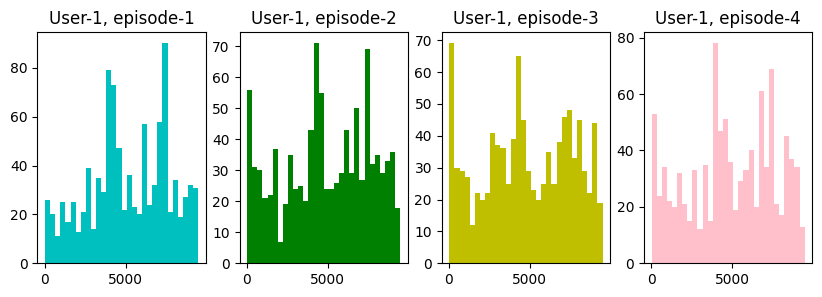

In [59]:
plt.figure(figsize = (10, 3))
plt.subplot(1,4,1)
plt.hist(user_1_1, bins = 30, color = 'c', label = ' User - 1 - obs-1')
plt.title("User-1, episode-1")
plt.subplot(1,4,2)
plt.hist(user_1_2, bins = 30, color = 'g', label = ' User - 1 - obs-2')
plt.title("User-1, episode-2")
plt.subplot(1,4,3)
plt.hist(user_1_3, bins = 30, color = 'y', label = ' User - 1 - obs-3')
plt.title("User-1, episode-3")
plt.subplot(1,4,4)
plt.hist(user_1_4, bins = 30, color = 'pink', label = ' User - 1 - obs-4')
plt.title("User-1, episode-4")

Text(0.5, 1.0, 'User-2, episode-4')

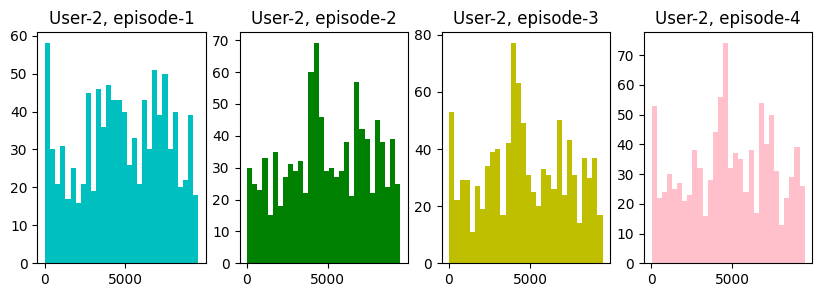

In [60]:
plt.figure(figsize = (10, 3))
plt.subplot(1,4,1)
plt.hist(user_0_1, bins = 30, color = 'c', label = ' User - 1 - obs-1')
plt.title("User-2, episode-1")
plt.subplot(1,4,2)
plt.hist(user_0_2, bins = 30, color = 'g', label = ' User - 1 - obs-2')
plt.title("User-2, episode-2")
plt.subplot(1,4,3)
plt.hist(user_0_3, bins = 30, color = 'y', label = ' User - 1 - obs-3')
plt.title("User-2, episode-3")
plt.subplot(1,4,4)
plt.hist(user_0_4, bins = 30, color = 'pink', label = ' User - 1 - obs-4')
plt.title("User-2, episode-4")

In [ ]:
plt.figure(figsize = (10, 3))
plt.subplot(1,4,1)
plt.hist(user_0_1, bins = 30, color = 'c', label = ' User - 1 - obs-1')
plt.subplot(1,4,2)
plt.hist(user_0_2, bins = 30, color = 'b', label = ' User - 1 - obs-2')
plt.subplot(1,4,3)
plt.hist(user_0_3, bins = 30, color = 'y', label = ' User - 1 - obs-3')
plt.subplot(1,4,4)
plt.hist(user_0_4, bins = 30, color = 'y', label = ' User - 1 - obs-4')

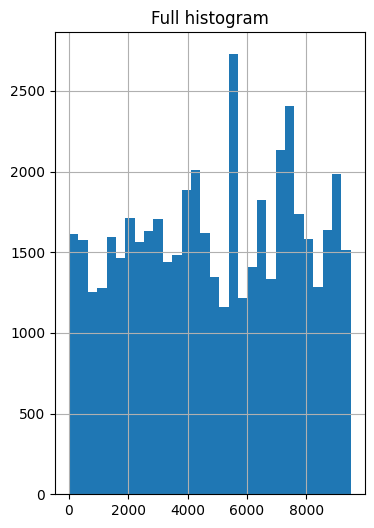

In [67]:
plt.figure(figsize = (4, 6))
plt.hist(df['item_idx'].values,  bins = 30)
plt.title("Full histogram")
plt.grid()

In [149]:
user_log = df[df['user_idx'] == user_idx]
for i in generator:
    #print (i)
    if i in items_of_user.values:
        print("IN ",  i)
        print(user_log[user_log['item_idx'] == i]['rating'].values)
    else:
         print("----------OUT ", i)

In [40]:
import pandas as pd

In [41]:
data = pd.read_csv("clickstream_1ku.csv")
data['ts'] = data['timestamp'].apply(pd.to_datetime)
data = data.sort_values(['ts'])
best_users_idx = data['user_id'].value_counts()[:20].index
data['user_idx'] = data['user_id']
filtered_raitings = data.set_index('user_id')
filtered_raitings = filtered_raitings.loc[best_users_idx]
filtered_raitings = filtered_raitings.reset_index(drop=False)

keys = list(set(filtered_raitings['item_id']))
item_mapping = dict(zip(keys, list(range(1, len(keys) + 1))))
filtered_raitings['item_idx'] = filtered_raitings['item_id'].apply(lambda x: item_mapping[x])

keys = list(set(filtered_raitings['user_idx']))
user_mapping = dict(zip(keys, list(range(1, len(keys) + 1))))
filtered_raitings['user_idx'] = filtered_raitings['user_idx'].apply(lambda x: user_mapping[x])


In [102]:
data = pd.read_csv("clickstream_1ku.csv")
data[data['user_id'] == 'df8a258b09f0e2f7335c9340b1c3c4c1']

,Unnamed: 0,user_id,item_id,timestamp,event,action,dur_sec,rating
1383,1383,df8a258b09f0e2f7335c9340b1c3c4c1,50988593,2022-05-03,playevent,NaN,328,3.0
1384,1384,df8a258b09f0e2f7335c9340b1c3c4c1,50988593,2022-05-03,playevent,NaN,328,3.0
1385,1385,df8a258b09f0e2f7335c9340b1c3c4c1,50988593,2022-05-03,playevent,NaN,328,3.0
1386,1386,df8a258b09f0e2f7335c9340b1c3c4c1,50988593,2022-05-03,playevent,NaN,328,3.0
1387,1387,df8a258b09f0e2f7335c9340b1c3c4c1,50988593,2022-05-03,playevent,NaN,328,3.0
...,...,...,...,...,...,...,...,...
119503,119503,df8a258b09f0e2f7335c9340b1c3c4c1,50988593,2022-04-07,playevent,NaN,328,3.0
119504,119504,df8a258b09f0e2f7335c9340b1c3c4c1,50988593,2022-04-07,playevent,NaN,328,3.0
119505,119505,df8a258b09f0e2f7335c9340b1c3c4c1,50988593,2022-04-07,playevent,NaN,328,3.0
119506,119506,df8a258b09f0e2f7335c9340b1c3c4c1,50988593,2022-04-07,playevent,NaN,328,3.0


In [107]:
data['rating'] = data['rating'].astype(float)

data[data['rating']<3]['rating'] = -data[data['rating']<3]['rating']

/tmp/ipykernel_64636/2959473777.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[data['rating']<3]['rating'] = -data[data['rating']<3]['rating']


In [108]:
data[data['rating']<3].values

array([[3127, '39bf5eacf30900683346e94acecb2f71', 34266436, ...,
        'BLOCK_ITEM_ON', -1, 1.0],
       [3957, '1408f6b5a0d98b7deef7f6a81bb9429e', 113438981, ...,
        'BLOCK_ITEM_ON', -1, 1.0],
       [4117, '5156fed06ec82ed93eac560014effb13', 86436499, ...,
        'BLOCK_ITEM_ON', -1, 1.0],
       ...,
       [192359, 'c4822abe506188c44438181010bce9ca', 42620138, ...,
        'BLOCK_ITEM_ON', -1, 1.0],
       [192360, 'c4822abe506188c44438181010bce9ca', 43723793, ...,
        'BLOCK_ITEM_ON', -1, 1.0],
       [192361, 'c4822abe506188c44438181010bce9ca', 43723793, ...,
        'BLOCK_ITEM_ON', -1, 1.0]], dtype=object)

In [113]:
df = mdp_train.dataframe

In [115]:
df['item_idx'].value_counts()

421     4422
7397     381
4356     300
28       229
4355     223
        ... 
5733       1
1791       1
4441       1
1278       1
1669       1
Name: item_idx, Length: 9494, dtype: int64